DESCRIPTION: This Python program will attempt to optimize an individual's portfolio of investments. We will utilize various Python libraries and many principles of mathematical finance in order to maximize returns from an initial capital investment. We will first create and analyze the performance of a simple, example portfolio, and then we will implement the PyPortfolioOpt library to optimize the example portfolio.

In [205]:
#Importing libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use('seaborn-bright')

#I: Creating an Example Portfolio

#We will import the data of 2 stocks each from the Healthcare, Technology, Energy, and Financial sectors
assets = ['UNH', 'MRK', 'AAPL', 'MSFT', 'JPM', 'BAC', 'XOM', 'CVX']

C:\Users\aniru\AppData\Local\Temp\ipykernel_11548\3118233467.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-bright')


In [206]:
#We will initially assign equivalent weights to all the stocks in the portfolio
weights = np.array([0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125])

In [207]:
#Set the start date of the portfolio
start_date = '2020-01-01'

#Set the end date of the portfolio (today)
end_date = datetime.today().strftime('%Y-%m-%d')

In [208]:
#Create a pandas dataframe to store the adjusted close price for the portfolio
df = pd.DataFrame()
for asset in assets:
    df[asset] = yf.download(asset, start=start_date, end=end_date)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.]),
 [Text(0, -100.0, '−100'),
  Text(0, 0.0, '0'),
  Text(0, 100.0, '100'),
  Text(0, 200.0, '200'),
  Text(0, 300.0, '300'),
  Text(0, 400.0, '400'),
  Text(0, 500.0, '500'),
  Text(0, 600.0, '600')])

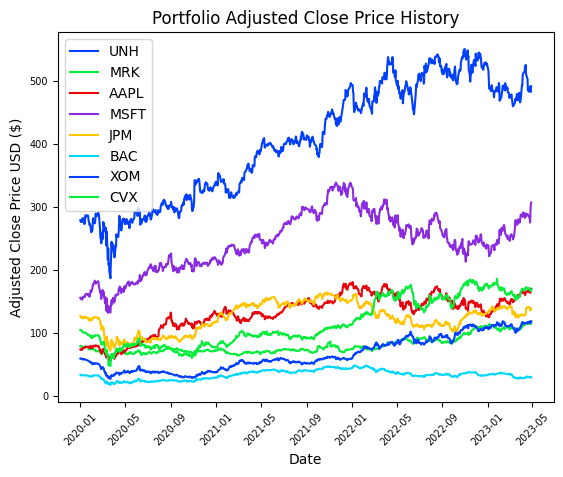

In [209]:
#Visualizing the portfolio
portfolio = df
for c in portfolio.columns.values:
    plt.plot(portfolio[c], label = c)

plt.title("Portfolio Adjusted Close Price History")
plt.xlabel('Date', fontsize = 10)
plt.ylabel('Adjusted Close Price USD ($)', fontsize = 10)
plt.legend(portfolio.columns.values, loc = 'upper left')
plt.xticks(fontsize=7, rotation=45)
plt.yticks(fontsize=7)

In [210]:
#Display the daily simple return of the portfolio
returns = df.pct_change()
returns

,UNH,MRK,AAPL,MSFT,JPM,BAC,XOM,CVX
Date,,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.010120,-0.008583,-0.009722,-0.012452,-0.013196,-0.020763,-0.008040,-0.003459
2020-01-06,0.006942,0.004274,0.007968,0.002585,-0.000795,-0.001433,0.007678,-0.003388
2020-01-07,-0.006037,-0.026626,-0.004703,-0.009118,-0.017001,-0.006599,-0.008184,-0.012769
2020-01-08,0.021084,-0.006726,0.016086,0.015928,0.007801,0.010110,-0.015080,-0.011423
...,...,...,...,...,...,...,...,...
2023-04-24,0.010582,0.004941,0.001879,-0.013963,0.001352,-0.003683,0.018878,0.013955
2023-04-25,0.006095,0.005089,-0.009436,-0.022536,-0.021744,-0.030914,-0.014213,-0.014521
2023-04-26,-0.018235,-0.026603,-0.000061,0.072435,-0.017724,-0.013870,-0.009183,-0.017812


In [211]:
#Create the annualized covariance matrix
annual_cov_matrix = returns.cov() * 252
annual_cov_matrix

,UNH,MRK,AAPL,MSFT,JPM,BAC,XOM,CVX
UNH,0.103927,0.044712,0.059747,0.059709,0.062729,0.067742,0.054497,0.069314
MRK,0.044712,0.063881,0.031692,0.033078,0.038644,0.040263,0.033226,0.042433
AAPL,0.059747,0.031692,0.128510,0.098024,0.061651,0.067885,0.046525,0.055867
MSFT,0.059709,0.033078,0.098024,0.118687,0.059521,0.065697,0.041155,0.054817
JPM,0.062729,0.038644,0.061651,0.059521,0.137105,0.138620,0.088654,0.101559
BAC,0.067742,0.040263,0.067885,0.065697,0.138620,0.163381,0.100960,0.110874
XOM,0.054497,0.033226,0.046525,0.041155,0.088654,0.100960,0.155711,0.140527
CVX,0.069314,0.042433,0.055867,0.054817,0.101559,0.110874,0.140527,0.169149


In [212]:
#Calculate the variance of the portfolio
portfolio_var = np.dot(weights.T, np.dot(annual_cov_matrix, weights))

#Calculate the volatility of the portfolio
portfolio_vol = np.sqrt(portfolio_var)

#Calculate the annual portfolio returns
simple_annual_returns = np.sum(returns.mean() * weights) * 252

In [213]:
#Display expected annual return, volatility, and variance as percentages
percent_var = str(round(portfolio_var * 100, 2)) + "%"
percent_vol = str(round(portfolio_vol * 100, 2)) + "%"
percent_returns = str(round(simple_annual_returns * 100, 2)) + "%"

print(f"Annual Variance: {percent_var}")
print(f"Annual Volatility (Risk): {percent_vol}")
print(f"Expected Annual Return: {percent_returns}")

Annual Variance: 7.47%
Annual Volatility (Risk): 27.33%
Expected Annual Return: 20.08%


In [214]:
#II: Portfolio Optimization

#Importing PyPortfolioOpt libraries
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
from pypfopt import risk_models
from pypfopt import expected_returns

In [215]:
#Calculate the expected returns and annualized sample covariance matrix
er = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

#Optimize for Max Sharpe ratio
ef = EfficientFrontier(er, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()

#Display Optimized Portfolio
print("Portfolio Asset Allocation:")
for key in cleaned_weights:
    percent = str(round(cleaned_weights[key] * 100, 2)) + "%"
    print(f'{key}: {percent}')
print()
ef.portfolio_performance(verbose = True)

Portfolio Asset Allocation:
UNH: 4.08%
MRK: 9.45%
AAPL: 59.31%
MSFT: 0.0%
JPM: 0.0%
BAC: 0.0%
XOM: 27.17%
CVX: 0.0%

Expected annual return: 25.3%
Annual volatility: 28.7%
Sharpe Ratio: 0.81


(0.25266437035172146, 0.2865792017192805, 0.8118676057295622)

From our optimized portfolio, we yield an expected annual return of 25.3%, a 5.22% increase in returns compared to the example portfolio.

In [216]:
#Get the discrete allocation of each share per stock
latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 1000) #Total Portfolio Value: Capital Invested into the Portfolio

#Display discrete allocation and funds remaining
allocation , leftover = da.greedy_portfolio()
print("Discrete Allocation:")
for key in allocation:
    if allocation[key] == 1:
        print(f'{allocation[key]} share of {key}')
    if allocation[key] != 1:
        print(f'{allocation[key]} shares of {key}')
        
print('Funds Remaining: ${:.2f}'.format(leftover))

Discrete Allocation:
3 shares of AAPL
2 shares of XOM
1 share of MRK
Funds Remaining: $138.81


This discrete portfolio allocation suggests that if an individual was to invest $1000 capital into this portfolio, then the optimal allocation of investments would be to own 3 shares of Apple Inc (AAPL), 2 shares of Exxon Mobil Corp (XOM), and 1 share of Merck & Co Inc (MRK), leaving $138.81 in remaining funds.